<a href="https://colab.research.google.com/github/pranavi2013/2203a52118/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import matplotlib.pyplot as plt
from collections import Counter
import random as rd

In [64]:
data=pd.read_csv('/content/diabetes2.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [66]:
data.shape

(768, 9)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [68]:
data.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [69]:
data.dropna(how='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


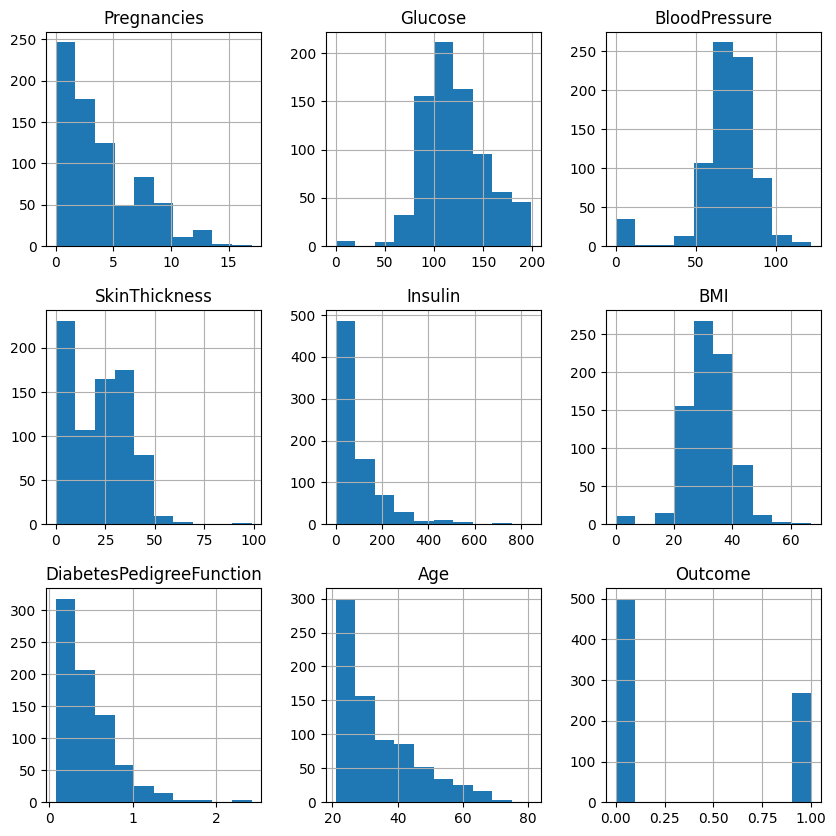

In [70]:
#histogram for each  feature
data.hist(bins=10,figsize=(10,10))
plt.show()

<Axes: >

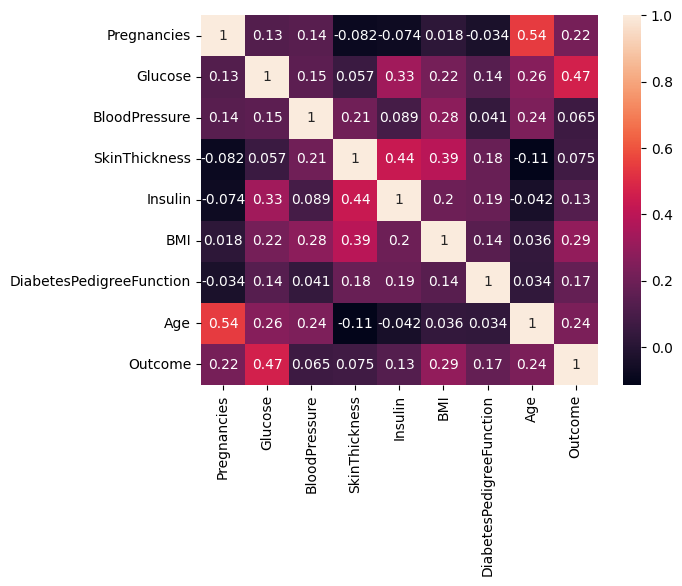

In [71]:
corrmat=data.corr()
sns.heatmap(corrmat, annot=True)

In [72]:
print('Class distribution before SMOTE:', Counter(data['Outcome']))

Class distribution before SMOTE: Counter({0: 500, 1: 268})


Class distribution after SMOTE: Counter({1: 500, 0: 500})
HISTOGRAM for each feature after SMOTE 


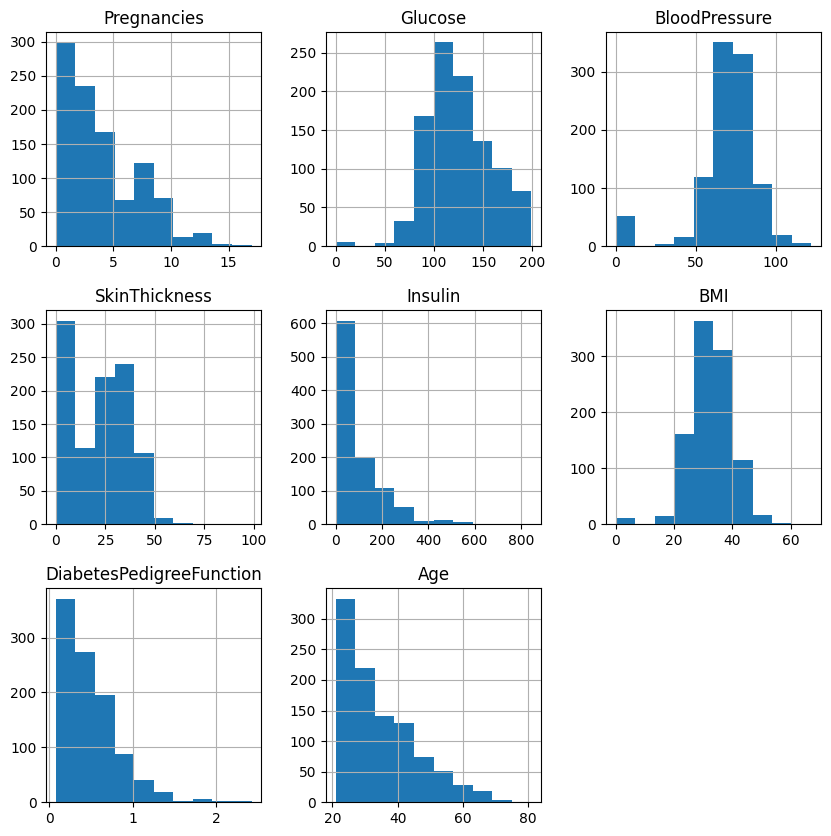

Correlation matrix after SMOTE


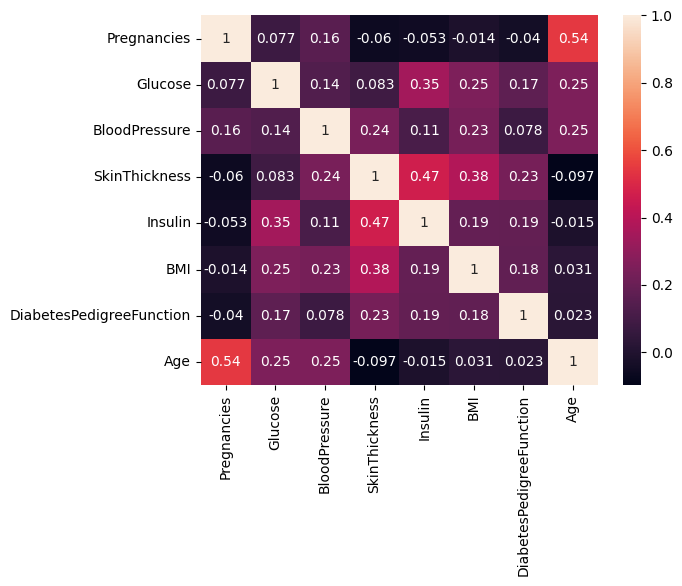

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.507538       0.622951       0.484848  0.212766  0.490313   
764     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
765     0.294118  0.608040       0.590164       0.232323  0.132388  0.390462   
766     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
767     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction       Age

In [73]:
#BEFORE PCA:
# Separate features and target variable
x= data.drop('Outcome', axis=1)
y= data['Outcome']
# Initialize SMOTE
smote = SMOTE(random_state=42)
# Apply SMOTE to generate synthetic samples
x_smote, y_smote = smote.fit_resample(x, y)
# Display the class distribution after applying SMOTE
print('Class distribution after SMOTE:', Counter(y_smote))
# Histogram for each feature after SMOTE
x_smote_df = pd.DataFrame(x_smote, columns=x.columns)
x_smote_df.hist(bins=10, figsize=(10, 10))
print("HISTOGRAM for each feature after SMOTE ")
plt.show()
# Correlation matrix after SMOTE
corrmat_smote = x_smote_df.corr()
sns.heatmap(corrmat_smote, annot=True)
print("Correlation matrix after SMOTE")
plt.show()
# Initialize Min-Max Scaler
scaler = MinMaxScaler()
# Normalize the features
x_normalized = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
print(x_normalized)
# Separate normalized features and target
normalized_features = x_smote  # Renaming for clarity
target = y_smote
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(normalized_features, target, test_size=0.2, random_state=20)

Accuracy of the Perceptron Model: 0.52
Confusion Matrix(Perceptron):
[[102   1]
 [ 95   2]]


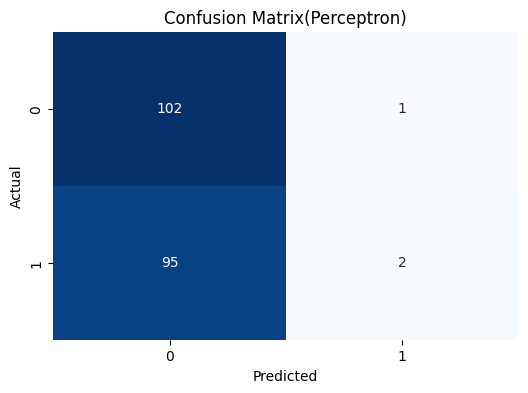

Classification Report (Perceptron):
               precision    recall  f1-score   support

           0       0.52      0.99      0.68       103
           1       0.67      0.02      0.04        97

    accuracy                           0.52       200
   macro avg       0.59      0.51      0.36       200
weighted avg       0.59      0.52      0.37       200



In [74]:
import random as rd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the perceptron function
def perceptron(weights, bias, x_test):
    y_pred = []
    for i in range(len(x_test)):
        z = np.dot(weights, x_test.iloc[i]) + bias
        if z >= 0:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

# Initialize random weights and bias
rd.seed(42)  # For reproducibility
weights = [rd.uniform(-1, 1) for _ in range(x_train.shape[1])]  # Assuming x_train has the same number of columns as weights
bias = rd.uniform(-1, 1)

# Make predictions using the perceptron function
y_pred_perceptron = perceptron(weights, bias, x_test)

# Calculate accuracy
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)

# Print the accuracy
print(f'Accuracy of the Perceptron Model: {accuracy_perceptron:.2f}')

# Calculate confusion matrix
cm_perceptron = confusion_matrix(y_test, y_pred_perceptron)

# Print confusion matrix
print("Confusion Matrix(Perceptron):")
print(cm_perceptron)

# Plot heatmap for confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_perceptron, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix(Perceptron)')
plt.show()

# Calculate and print the classification report
classification_rep = classification_report(y_test, y_pred_perceptron)
print("Classification Report (Perceptron):\n", classification_rep)


Accuracy of logistic regression: 0.7402597402597403
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.77      0.85      0.81       101
           1       0.65      0.53      0.58        53

    accuracy                           0.74       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154

Confusion Matrix:
[[86 15]
 [25 28]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


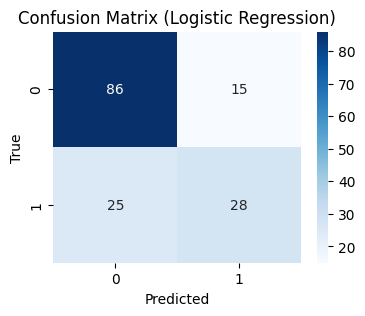

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

def logistic_regression(df):
    # Fill missing values with mean
    df.fillna(df.mean(), inplace=True)

    # Check for NaNs in the target variable
    if df['Outcome'].isnull().sum() > 0:
        raise ValueError("NaNs found in the target variable.")

    # Separate features and target variable
    X = df.drop('Outcome', axis=1)  # Assuming 'Outcome' is the target variable
    y = df['Outcome']

    # Split the data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

    # Create and train the logistic regression model
    logistic_reg = LogisticRegression()
    logistic_reg.fit(x_train, y_train)

    # Predict on the test set
    y_pred = logistic_reg.predict(x_test)

    # Calculate accuracy and print classification report
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy of logistic regression:", accuracy)

    # Calculate and print the classification report
    classification_rep = classification_report(y_test, y_pred)
    print("Classification Report (Logistic Regression):\n", classification_rep)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Plot heatmap for confusion matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix (Logistic Regression)')
    plt.show()

# Assuming df is the DataFrame containing the dataset
logistic_regression(data)


Accuracy of SVM: 0.7597402597402597
Confusion Matrix (SVM):
[[88 13]
 [24 29]]


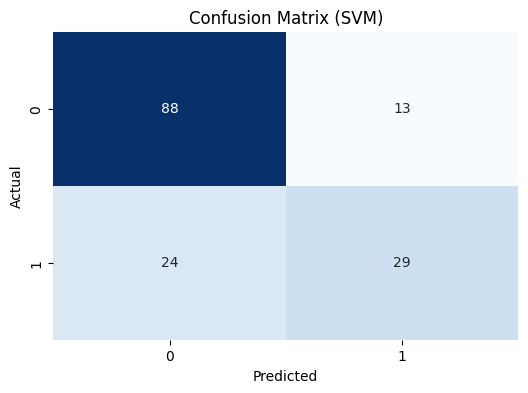

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       101
           1       0.69      0.55      0.61        53

    accuracy                           0.76       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154



In [76]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

def svm_classification(data):
    # Fill missing values with mean
    data.fillna(data.mean(), inplace=True)

    # Check for NaNs in the target variable
    if data['Outcome'].isnull().sum() > 0:
        raise ValueError("NaNs found in the target variable.")

    # Separate features and target variable
    X = data.drop('Outcome', axis=1)  # Assuming 'Outcome' is the target variable
    y = data['Outcome']
    # Split the data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
    # Create and train the SVM model
    svm_model = SVC(kernel='linear', random_state=20)  # Using a linear kernel for simplicity
    svm_model.fit(x_train, y_train)
    # Predict on the test set
    y_pred_svm = svm_model.predict(x_test)
    # Calculate accuracy
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    print("Accuracy of SVM:", accuracy_svm)
    # Calculate confusion matrix
    cm_svm = confusion_matrix(y_test, y_pred_svm)
    # Print confusion matrix
    print("Confusion Matrix (SVM):")
    print(cm_svm)
    # Plot heatmap for confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix (SVM)')
    plt.show()

    # Calculate and print the classification report
    classification_rep = classification_report(y_test, y_pred_svm)
    print("Classification Report (SVM):\n", classification_rep)

# Assuming df is the DataFrame containing the dataset
svm_classification(data)


[0.715, 0.735, 0.71, 0.69, 0.695, 0.7, 0.705, 0.7, 0.705, 0.69, 0.695, 0.69, 0.695, 0.7, 0.715, 0.71, 0.715, 0.72, 0.715]


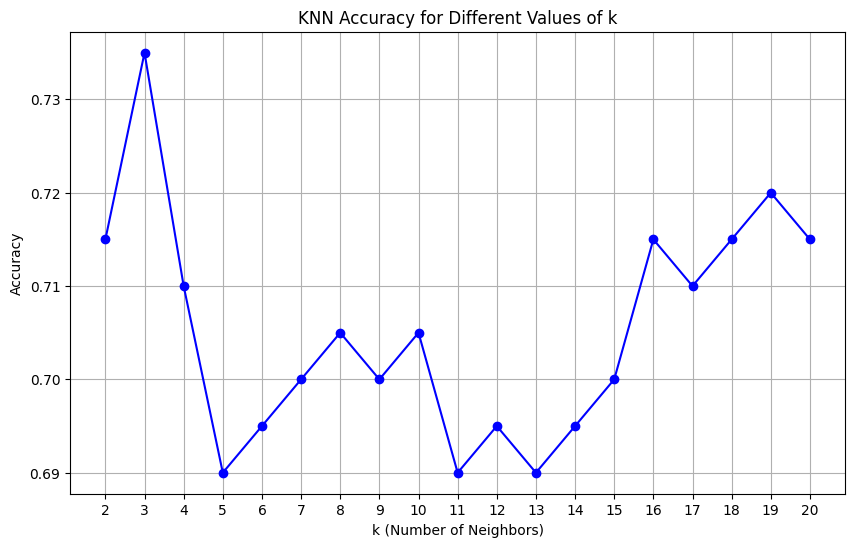

AT K=3 IAM GETTING GOOD ACUURACY


In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_features, target, test_size=0.2, random_state=55)
k_values = list(range(2, 21))
accuracy_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print(accuracy_scores)
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy for Different Values of k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()
print("AT K=3 IAM GETTING GOOD ACUURACY")

In [78]:
#after PCA
X = data.drop('Outcome', axis=1)
y = data['Outcome']
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA(n_components=4)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Perceptron Accuracy after PCA: 0.6328
Standard Deviation of Accuracy: 0.1037
Coefficient of Variation: 0.1639
The Perceptron model is not consistent.


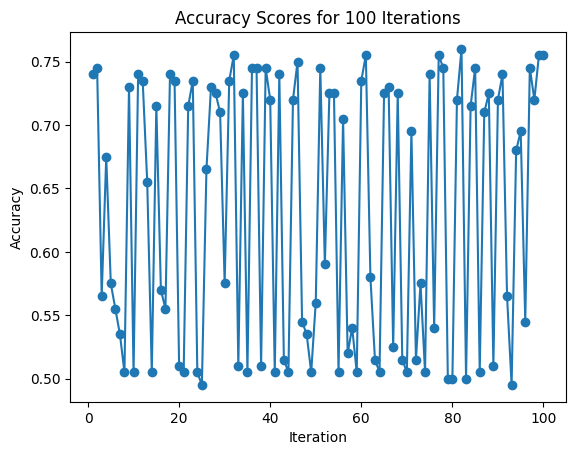

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.71      0.74        99
           1       0.74      0.80      0.77       101

    accuracy                           0.76       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.76      0.75       200



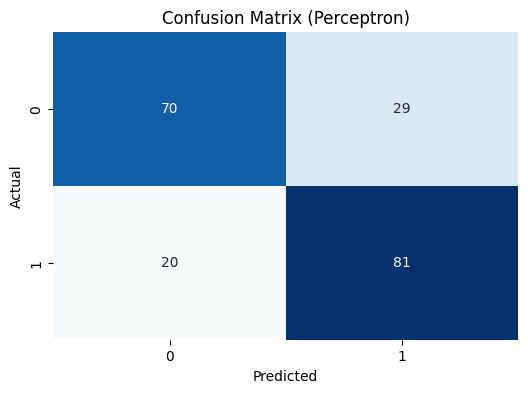

In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

num_bootstraps = 100  # You can adjust the number of bootstraps as needed
accuracies = []

for _ in range(num_bootstraps):
    indices = range(len(X_train_pca))
    bootstrap_indices = np.random.choice(indices, len(indices), replace=True)
    X_train_bootstrap = X_train_pca[bootstrap_indices]
    y_train_bootstrap = y_train.iloc[bootstrap_indices]
    perceptron = Perceptron()
    perceptron.fit(X_train_bootstrap, y_train_bootstrap)
    y_pred_perceptron = perceptron.predict(X_test_pca)
    accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
    accuracies.append(accuracy_perceptron)

mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
cv = std_accuracy / mean_accuracy
print(f'Perceptron Accuracy after PCA: {mean_accuracy:.4f}')
print(f'Standard Deviation of Accuracy: {std_accuracy:.4f}')
print(f'Coefficient of Variation: {cv:.4f}')
if cv < 0.1:
    print('The Perceptron model is consistent.')
else:
    print('The Perceptron model is not consistent.')

# Plot the accuracy scores for 100 iterations
plt.plot(range(1, num_bootstraps + 1), accuracies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for 100 Iterations')
plt.show()

# Calculate and print the classification report
classification_rep = classification_report(y_test, y_pred_perceptron)
print("Classification Report:\n", classification_rep)

cm_perceptron = confusion_matrix(y_test, y_pred_perceptron)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_perceptron, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Perceptron)')
plt.show()


Logistic Regression Accuracy after PCA: 0.7477
Standard Deviation of Accuracy: 0.0108
Coefficient of Variation: 0.0144
The Logistic Regression model is consistent.
Classification Report for Logistic Regression after PCA:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74        99
           1       0.74      0.76      0.75       101

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200



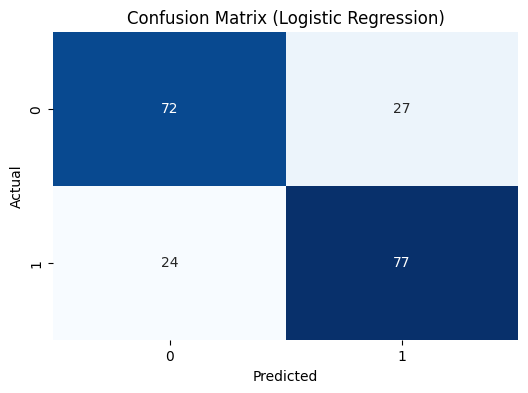

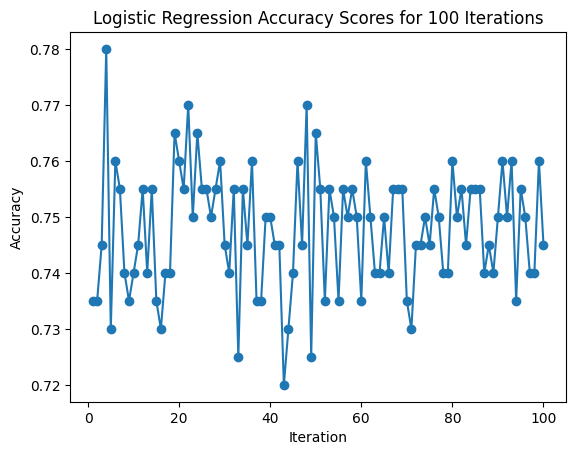

In [80]:
# Perform your bootstrapping and PCA here to obtain X_train_pca, y_train, and X_test_pca.

num_bootstraps = 100  # You can adjust the number of bootstraps as needed
accuracies_lr = []

for _ in range(num_bootstraps):
    indices = range(len(X_train_pca))
    bootstrap_indices = np.random.choice(indices, len(indices), replace=True)
    X_train_bootstrap = X_train_pca[bootstrap_indices]
    y_train_bootstrap = y_train.iloc[bootstrap_indices]
    logistic_regression = LogisticRegression()
    logistic_regression.fit(X_train_bootstrap, y_train_bootstrap)
    y_pred_lr = logistic_regression.predict(X_test_pca)
    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    accuracies_lr.append(accuracy_lr)

mean_accuracy_lr = np.mean(accuracies_lr)
std_accuracy_lr = np.std(accuracies_lr)
cv_lr = std_accuracy_lr / mean_accuracy_lr

print(f'Logistic Regression Accuracy after PCA: {mean_accuracy_lr:.4f}')
print(f'Standard Deviation of Accuracy: {std_accuracy_lr:.4f}')
print(f'Coefficient of Variation: {cv_lr:.4f}')

if cv_lr < 0.1:
    print('The Logistic Regression model is consistent.')
else:
    print('The Logistic Regression model is not consistent.')

# Classification report
classification_report_lr = classification_report(y_test, y_pred_lr)
print("Classification Report for Logistic Regression after PCA:")
print(classification_report_lr)

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

# Plot the accuracy scores for 100 iterations
plt.plot(range(1, num_bootstraps + 1), accuracies_lr, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy Scores for 100 Iterations')
plt.show()


SVM Accuracy after PCA: 0.7402
Standard Deviation of Accuracy: 0.0149
Coefficient of Variation: 0.0201
The SVM model is consistent.
Classification Report for SVM after PCA:
              precision    recall  f1-score   support

           0       0.75      0.74      0.74        99
           1       0.75      0.76      0.75       101

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200



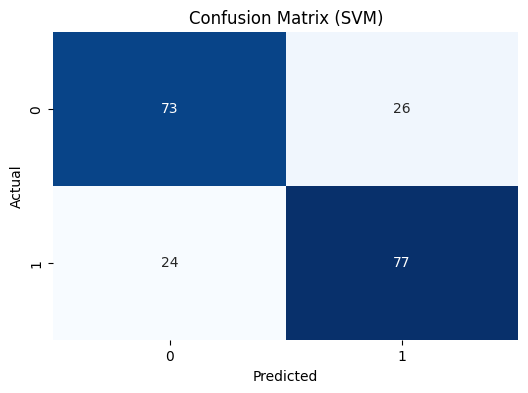

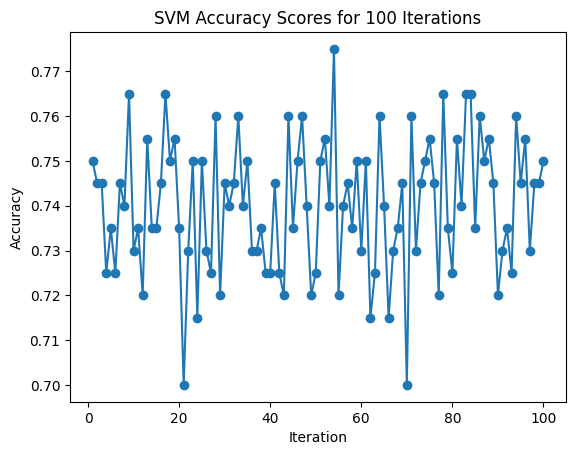

In [81]:
# Perform your bootstrapping and PCA here to obtain X_train_pca, y_train, and X_test_pca.

from sklearn.svm import SVC

num_bootstraps = 100  # You can adjust the number of bootstraps as needed
accuracies_svm = []

for _ in range(num_bootstraps):
    indices = range(len(X_train_pca))
    bootstrap_indices = np.random.choice(indices, len(indices), replace=True)
    X_train_bootstrap = X_train_pca[bootstrap_indices]
    y_train_bootstrap = y_train.iloc[bootstrap_indices]
    svm = SVC()  # Create an instance of the SVM model
    svm.fit(X_train_bootstrap, y_train_bootstrap)
    y_pred_svm = svm.predict(X_test_pca)
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    accuracies_svm.append(accuracy_svm)

mean_accuracy_svm = np.mean(accuracies_svm)
std_accuracy_svm = np.std(accuracies_svm)
cv_svm = std_accuracy_svm / mean_accuracy_svm

print(f'SVM Accuracy after PCA: {mean_accuracy_svm:.4f}')
print(f'Standard Deviation of Accuracy: {std_accuracy_svm:.4f}')
print(f'Coefficient of Variation: {cv_svm:.4f}')

if cv_svm < 0.1:
    print('The SVM model is consistent.')
else:
    print('The SVM model is not consistent.')

# Classification report
classification_report_svm = classification_report(y_test, y_pred_svm)
print("Classification Report for SVM after PCA:")
print(classification_report_svm)

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')
plt.show()

# Plot the accuracy scores for 100 iterations
plt.plot(range(1, num_bootstraps + 1), accuracies_svm, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy Scores for 100 Iterations')
plt.show()


KNN Accuracy after PCA: 0.6970
Standard Deviation of Accuracy: 0.0266
Coefficient of Variation: 0.0381
The KNN model is consistent.


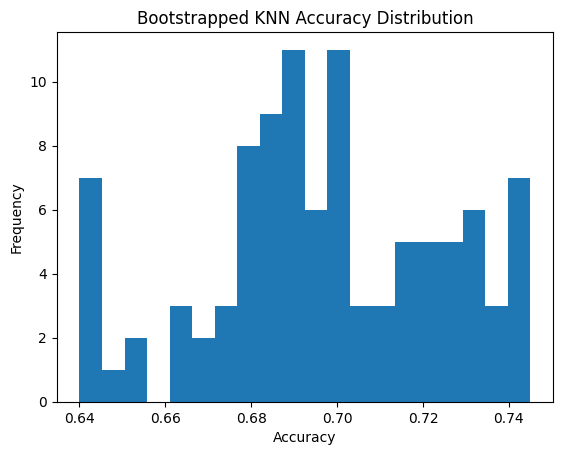

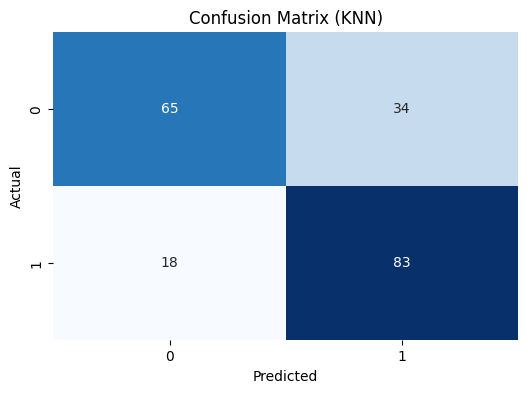

              precision    recall  f1-score   support

           0       0.78      0.66      0.71        99
           1       0.71      0.82      0.76       101

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200



In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

accuracies_knn = []

for _ in range(num_bootstraps):
    indices = range(len(X_train_pca))
    bootstrap_indices = np.random.choice(indices, len(indices), replace=True)
    X_train_bootstrap = X_train_pca[bootstrap_indices]
    y_train_bootstrap = y_train.iloc[bootstrap_indices]
    knn = KNeighborsClassifier()
    knn.fit(X_train_bootstrap, y_train_bootstrap)
    y_pred_knn = knn.predict(X_test_pca)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    accuracies_knn.append(accuracy_knn)

mean_accuracy_knn = np.mean(accuracies_knn)
std_accuracy_knn = np.std(accuracies_knn)
cv_knn = std_accuracy_knn / mean_accuracy_knn  # Coefficient of Variation

print(f'KNN Accuracy after PCA: {mean_accuracy_knn:.4f}')
print(f'Standard Deviation of Accuracy: {std_accuracy_knn:.4f}')
print(f'Coefficient of Variation: {cv_knn:.4f}')

if cv_knn < 0.1:
    print('The KNN model is consistent.')
else:
    print('The KNN model is not consistent.')

plt.hist(accuracies_knn, bins=20)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Bootstrapped KNN Accuracy Distribution')
plt.show()

cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (KNN)')
plt.show()

classification_rep = classification_report(y_test, y_pred_knn)
print(classification_rep)
